<a href="https://colab.research.google.com/github/anna-murphy-99/igpdemorepository/blob/main/QB_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib==3.7.5
#==3.6.2

In [2]:
!pip install scanpy==1.10.1
!pip install pandas==2.2.2
!pip install numpy==1.26.4

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=35f98cce983ab71013140ae4761563596105976f46d533b6050bc1378a67a3ed
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [3]:
!pip install anndata

In [4]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.3 MB/s eta 0:00:00


In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import anndata as ad

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

In [6]:
#Downloads the data from online
dat = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")

  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
dat.var_names_make_unique() #makes variables unique in the data
dat.var["mt"] = dat.var_names.str.startswith("MT-") #identifies the mitochondrial genes
sc.pp.calculate_qc_metrics(dat, qc_vars=["mt"], inplace=True) #calculates the classic qc met

In [8]:
dat

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [9]:
sc.pp.filter_cells(dat, min_counts=5000) #filters minimum and maximum gene count info
sc.pp.filter_cells(dat, max_counts=35000)
dat = dat[dat.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {dat.n_obs}")
sc.pp.filter_genes(dat, min_cells=10)

#cells after MT filter: 3861


In [10]:
sc.pp.normalize_total(dat, inplace=True) #normalize
sc.pp.log1p(dat) #log transform
sc.pp.highly_variable_genes(dat, flavor="seurat", n_top_genes=2000)

In [11]:
sc.pp.pca(dat)
sc.pp.neighbors(dat)
sc.tl.umap(dat)
sc.tl.leiden(dat, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)

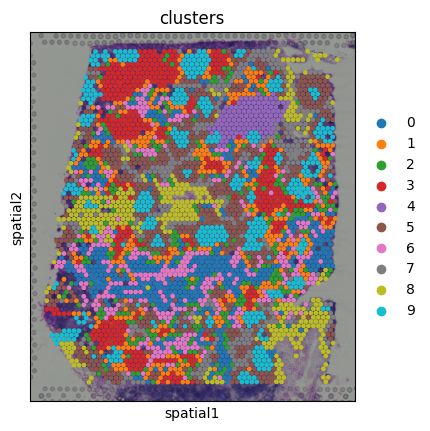

In [13]:
sc.pl.spatial(dat, img_key="hires", color="clusters", size=1.5)
#For hw: overlaying a gene of interest --> use scanpy spatial info

categories: 0, 1, 2, etc.
var_group_labels: 9


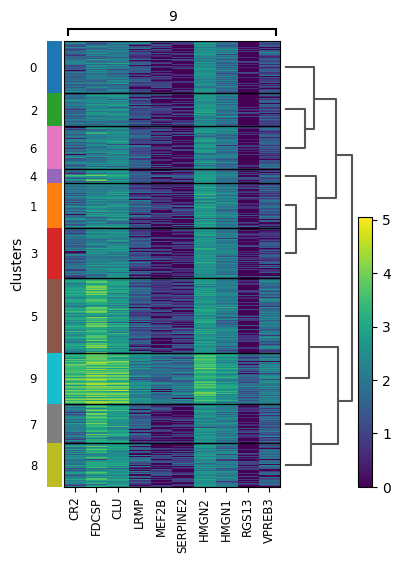

In [15]:
sc.tl.rank_genes_groups(dat, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(dat, groups="9", n_genes=10, groupby="clusters")

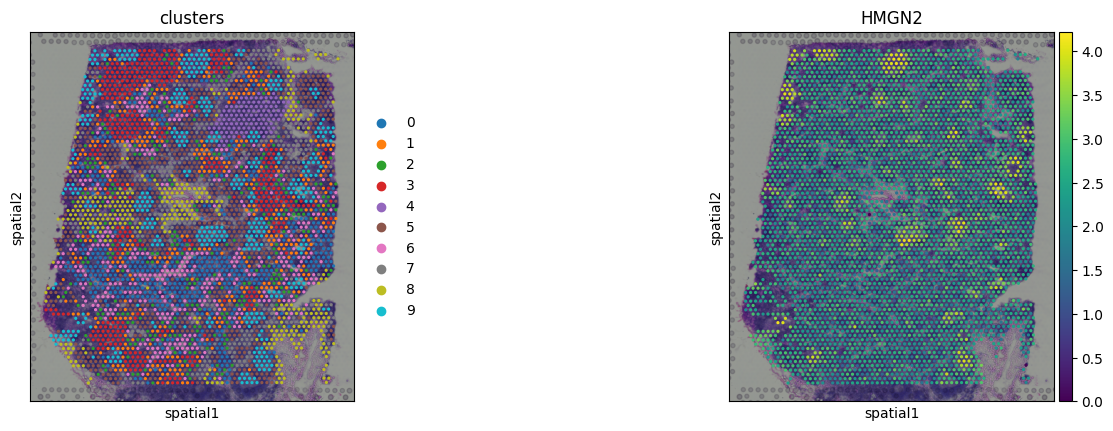

In [17]:
sc.pl.spatial(dat, img_key="hires", color=["clusters", "HMGN2"])